# Exploratory Data Analysis with polars Library

In [2]:
# Load Libraries
import polars as pl
import polars.selectors as cs
from plotnine import *
from mizani.labels import label_number

import sys 

# Display system and polars versions
print(f'My system version is {sys.version};\npolars version is {pl.__version__}')

My system version is 3.12.4 (main, Jul  1 2024, 00:48:18) [Clang 15.0.0 (clang-1500.3.9.4)];
polars version is 1.2.1
My system version is 3.12.4 (main, Jul  1 2024, 00:48:18) [Clang 15.0.0 (clang-1500.3.9.4)];
polars version is 1.2.1


In [3]:
url ='https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv'

world_pop_raw = pl.read_csv(url)

# Inspect output
print(world_pop_raw)

shape: (234, 17)
┌──────┬──────┬───────────────────┬──────────────────┬───┬────────────┬───────────────────┬─────────────┬─────────────────────────────┐
│ Rank ┆ CCA3 ┆ Country           ┆ Capital          ┆ … ┆ Area (km²) ┆ Density (per km²) ┆ Growth Rate ┆ World Population Percentage │
│ ---  ┆ ---  ┆ ---               ┆ ---              ┆   ┆ ---        ┆ ---               ┆ ---         ┆ ---                         │
│ i64  ┆ str  ┆ str               ┆ str              ┆   ┆ i64        ┆ f64               ┆ f64         ┆ f64                         │
╞══════╪══════╪═══════════════════╪══════════════════╪═══╪════════════╪═══════════════════╪═════════════╪═════════════════════════════╡
│ 36   ┆ AFG  ┆ Afghanistan       ┆ Kabul            ┆ … ┆ 652230     ┆ 63.0587           ┆ 1.0257      ┆ 0.52                        │
│ 138  ┆ ALB  ┆ Albania           ┆ Tirana           ┆ … ┆ 28748      ┆ 98.8702           ┆ 0.9957      ┆ 0.04                        │
│ 34   ┆ DZA  ┆ Algeria        

In [4]:
world_pop_raw.dtypes

[Int64,
 String,
 String,
 String,
 String,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Float64,
 Float64]

In [5]:
print(world_pop_raw.describe())

shape: (9, 18)
┌────────────┬───────────┬──────┬─────────────┬───┬──────────────┬───────────────────┬─────────────┬─────────────────────────────┐
│ statistic  ┆ Rank      ┆ CCA3 ┆ Country     ┆ … ┆ Area (km²)   ┆ Density (per km²) ┆ Growth Rate ┆ World Population Percentage │
│ ---        ┆ ---       ┆ ---  ┆ ---         ┆   ┆ ---          ┆ ---               ┆ ---         ┆ ---                         │
│ str        ┆ f64       ┆ str  ┆ str         ┆   ┆ f64          ┆ f64               ┆ f64         ┆ f64                         │
╞════════════╪═══════════╪══════╪═════════════╪═══╪══════════════╪═══════════════════╪═════════════╪═════════════════════════════╡
│ count      ┆ 234.0     ┆ 234  ┆ 234         ┆ … ┆ 232.0        ┆ 230.0             ┆ 232.0       ┆ 234.0                       │
│ null_count ┆ 0.0       ┆ 0    ┆ 0           ┆ … ┆ 2.0          ┆ 4.0               ┆ 2.0         ┆ 0.0                         │
│ mean       ┆ 117.5     ┆ null ┆ null        ┆ … ┆ 581663.74569 ┆ 4

In [6]:
print(world_pop_raw.glimpse())

Rows: 234
Columns: 17
$ Rank                        <i64> 36, 138, 34, 213, 203, 42, 224, 201, 33, 140
$ CCA3                        <str> 'AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM'
$ Country                     <str> 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia'
$ Capital                     <str> 'Kabul', 'Tirana', 'Algiers', 'Pago Pago', 'Andorra la Vella', 'Luanda', 'The Valley', 'Saint John’s', 'Buenos Aires', 'Yerevan'
$ Continent                   <str> 'Asia', 'Europe', 'Africa', 'Oceania', 'Europe', 'Africa', 'North America', 'North America', 'South America', 'Asia'
$ 2022 Population             <i64> 41128771, 2842321, 44903225, 44273, 79824, 35588987, 15857, 93763, 45510318, 2780469
$ 2020 Population             <i64> 38972230, 2866849, 43451666, 46189, 77700, 33428485, 15585, 92664, 45036032, 2805608
$ 2015 Population             <i64> 33753499, 2882481, 3954315

In [7]:
print(world_pop_raw.null_count())

shape: (1, 17)
┌──────┬──────┬─────────┬─────────┬───┬────────────┬───────────────────┬─────────────┬─────────────────────────────┐
│ Rank ┆ CCA3 ┆ Country ┆ Capital ┆ … ┆ Area (km²) ┆ Density (per km²) ┆ Growth Rate ┆ World Population Percentage │
│ ---  ┆ ---  ┆ ---     ┆ ---     ┆   ┆ ---        ┆ ---               ┆ ---         ┆ ---                         │
│ u32  ┆ u32  ┆ u32     ┆ u32     ┆   ┆ u32        ┆ u32               ┆ u32         ┆ u32                         │
╞══════╪══════╪═════════╪═════════╪═══╪════════════╪═══════════════════╪═════════════╪═════════════════════════════╡
│ 0    ┆ 0    ┆ 0       ┆ 0       ┆ … ┆ 2          ┆ 4                 ┆ 2           ┆ 0                           │
└──────┴──────┴─────────┴─────────┴───┴────────────┴───────────────────┴─────────────┴─────────────────────────────┘
shape: (1, 17)
┌──────┬──────┬─────────┬─────────┬───┬────────────┬───────────────────┬─────────────┬─────────────────────────────┐
│ Rank ┆ CCA3 ┆ Country ┆ Capital 

In [8]:
print(
    world_pop_raw
    .select(cs.all().is_null().sum())
    .glimpse()
)

Rows: 1
Columns: 17
$ Rank                        <u32> 0
$ CCA3                        <u32> 0
$ Country                     <u32> 0
$ Capital                     <u32> 0
$ Continent                   <u32> 0
$ 2022 Population             <u32> 4
$ 2020 Population             <u32> 1
$ 2015 Population             <u32> 4
$ 2010 Population             <u32> 7
$ 2000 Population             <u32> 7
$ 1990 Population             <u32> 5
$ 1980 Population             <u32> 5
$ 1970 Population             <u32> 4
$ Area (km²)                  <u32> 2
$ Density (per km²)           <u32> 4
$ Growth Rate                 <u32> 2
$ World Population Percentage <u32> 0

None
Rows: 1
Columns: 17
$ Rank                        <u32> 0
$ CCA3                        <u32> 0
$ Country                     <u32> 0
$ Capital                     <u32> 0
$ Continent                   <u32> 0
$ 2022 Population             <u32> 4
$ 2020 Population             <u32> 1
$ 2015 Population             <u32> 4
$ 20

In [10]:
# Unique column values
print(
    world_pop_raw
    .unique(subset=['CCA3', 'Country'], maintain_order=True)
    .get_column('Country')
)

shape: (234,)
Series: 'Country' [str]
[
	"Afghanistan"
	"Albania"
	"Algeria"
	"American Samoa"
	"Andorra"
	…
	"Wallis and Futuna"
	"Western Sahara"
	"Yemen"
	"Zambia"
	"Zimbabwe"
]
shape: (234,)
Series: 'Country' [str]
[
	"Afghanistan"
	"Albania"
	"Algeria"
	"American Samoa"
	"Andorra"
	…
	"Wallis and Futuna"
	"Western Sahara"
	"Yemen"
	"Zambia"
	"Zimbabwe"
]


In [11]:
continent_mean_pop = (
    world_pop_raw
    .group_by('Continent')
    .agg(cs.ends_with('Population').mean())
    .sort('2022 Population', descending=False)
    .unpivot(cs.numeric(), index='Continent', variable_name='year', value_name='population')
    .with_columns(year=pl.col('year').str.strip_chars(' Population'))
)

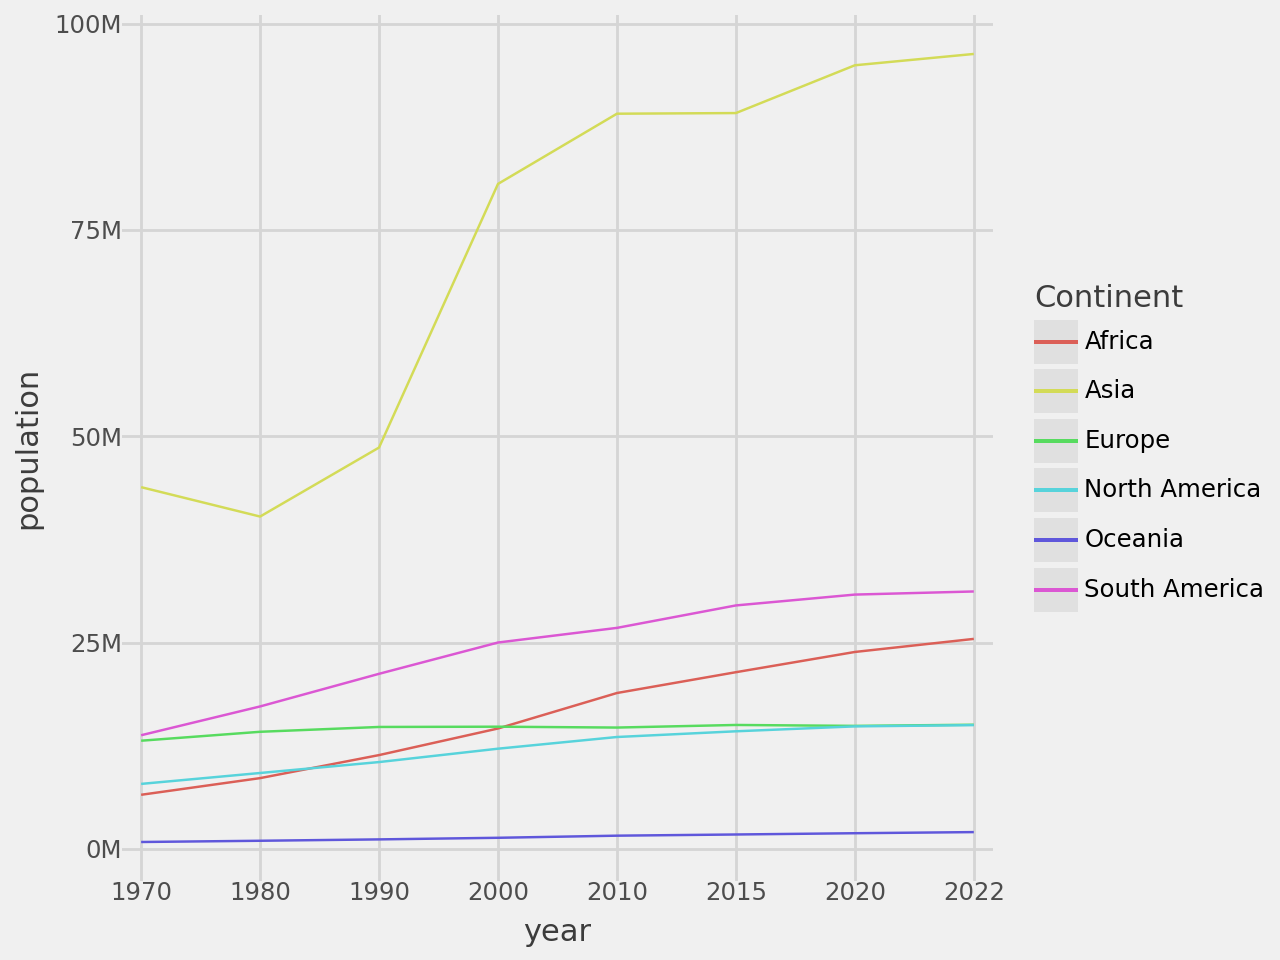

In [12]:
(
    ggplot(continent_mean_pop, aes('year', 'population', group='Continent'))
    + geom_line(aes(color='Continent'))
    + scale_y_continuous(
        labels=label_number(scale=1e-6, suffix='M'),
        expand=(0.05, 0.02)
    )
    + scale_x_discrete(expand=(0.02, 0.02))
    + theme_538()
)

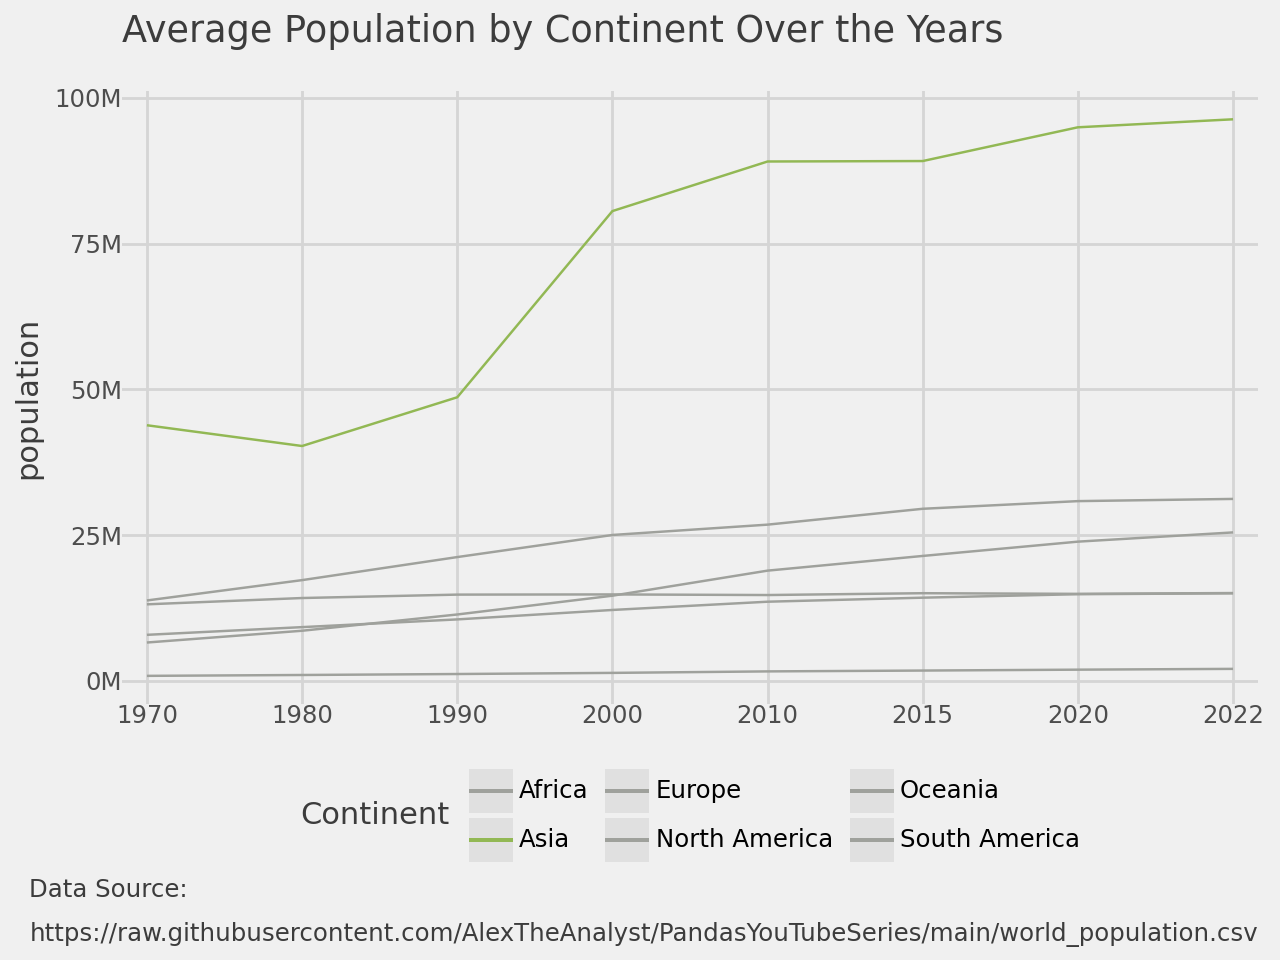

In [13]:
(
    ggplot(continent_mean_pop, aes('year', 'population', group='Continent'))
    + geom_line(aes(color='Continent'))
    + scale_y_continuous(
        labels=label_number(scale=1e-6, suffix='M'),
        expand=(0.05, 0.02)
    )
    + scale_x_discrete(expand=(0.02, 0.02))
    + scale_color_manual(values=['#9fa19c', '#92b854', '#9fa19c', '#9fa19c', '#9fa19c', '#9fa19c'])
    + guides(shape=None, color=None, fill=None)
    + theme_538()
    + labs(
        x=None,
        title='Average Population by Continent Over the Years',
        caption='Data Source:\n\nhttps://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv'
    )
    + theme(
        plot_title=element_text(ha=0, margin={'t': 15, 'b': 15}),
        legend_position='bottom',
        axis_title_x=element_blank()
    )
)